<h1> Plakansiksnas pārvada aprēķins <h1>

Uzdevums: Aprēķināt tāda pārvada parametrus, kas savieno horizontāli un paralēli novietotas vārpstas.

Pārvada izveidojuma shēma parādīta 1. attēlā.
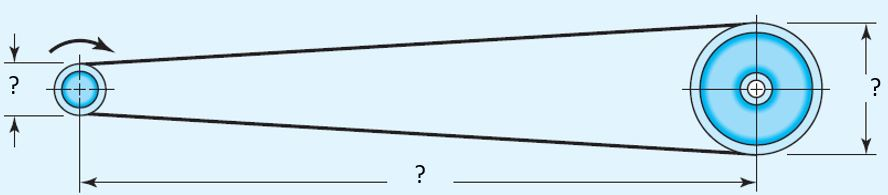
<div align="center">  1. att. Plakansiksnas pārvada shēma  <br>
<div align="left">


Veicot aprēķinu, jānoskaidro:
- siksnas parametri (veids, platums, biezums);
- nepieciešamie siksnas spriegošanas parametri;
- pārvada radītā slodze uz vārpstām.

<br>

Aprēķina izejas dati ir:
- skriemeļu asu attālums;
- pārvadāmā jauda;
- jaudas avota un piedzenamā skriemeļa rotācijas ātrums.



Pārvadu projektējot, izvēlamais vispārēja pielietojuma plakansiksu Habasit A3. Tās galvenie parametri parādīti ražotāja bukletā: <br>
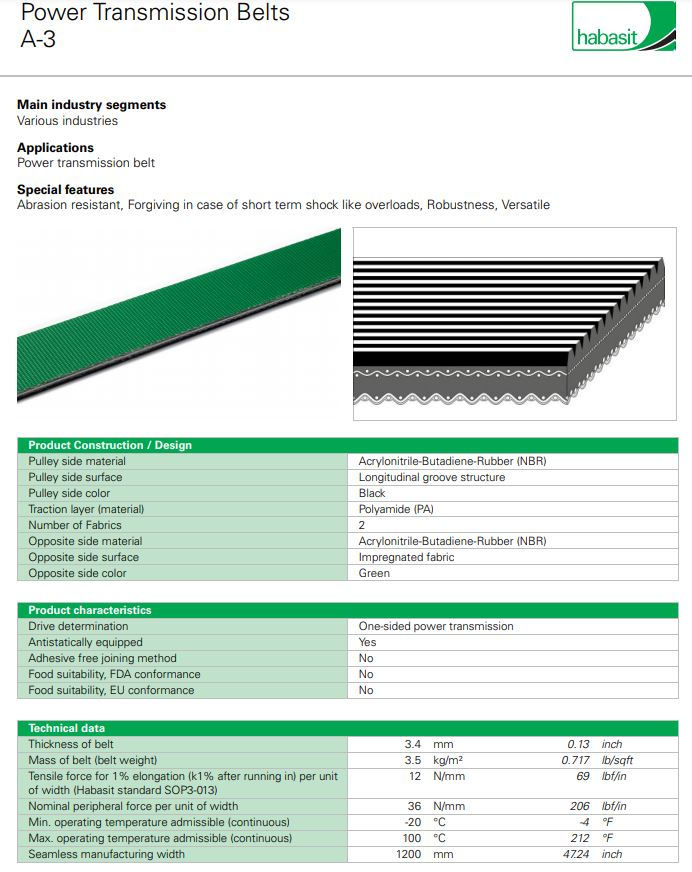 <br>
Siksnas darba virsmas berzes koeficienta vērtība ir:

 $\mu$ = 0.495. <br>
 Aprēķinu var sākt, ievadot pārvada robežparametrus:
 
 - motora rotācijas ātrums, $n_m$ [apgr./min];
 - motora jauda, P [kW];
 - dzītā skriemeļa rotācijas ātrums, $n_s$ [apgr./min];
 - asu attālums [m];
 - darba režīma faktors Ks = 1.15.

 


In [21]:
n_m=1000 #motora apgriezieni

P=2*1000 # motora jauda, W

n_s=500 # dzenamā skriemeļa apgriezieni
C=2 # asu attālums, m

Ks=1.15 # darba režīma koeficients
F_un=36*1000 # siksnas nominālais aploces spēks pret siksnas platumu, N/m
t= 3.4/1000 # siksnas biezums, m
m_i=3.5 # siksnas īpatnējā masa, kg/m2
K_1= 12*1000 # stiepes spēks 1% pagarinājumam, N/m
mu=0.495 # berzes koeficients

dzenošā skriemeļa leņķiskais ātrums [rad/s]: $$\omega_d=\frac{2\pi\cdot n_m}{60}$$


In [22]:
import numpy as np

omega_d=(2*np.pi*n_m)/60
print (np.round(omega_d))

105.0


dzenošā skriemeļa griezes moments [Nm]: $$ T_d=\frac{P\cdot 1000}{\omega_d} $$


In [23]:
T_d=(P)/omega_d

optimālais dzenošā skriemeļa diametrs [m]: $$d=\frac{60 \cdot \sqrt[3]{T_d} }{1000}$$

In [24]:
d=(60*(T_d**(1/3)))/1000
print ((d))

0.16038055410863708


Pārvada pārnesuma skaitlis:
    $$u=\frac{n_m}{n_s}$$ <br>
    Dzītā skriemeļa diametrs:
    $$ D=d\cdot u$$
  

In [25]:
u=n_m/n_s

D=d*u

# šeit var koriģēt skriemeļu diamterus
cd=1.2 # izmēra korekcija

d=d*cd
D=D*cd


print (D)

0.38491332986072896


Nosakām siksnas aptveres leņķi (grādos) uz mazā skriemeļa:

$$ \beta_d=180-\frac {D-d}{C} \cdot 60$$
kur C  - asu attālums, m. <br>
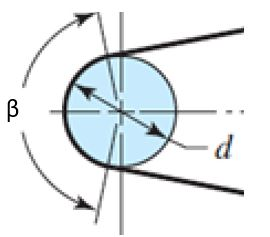


In [26]:
beta_d=180-((D-d)/C) * 60

print (beta_d) #aptveres leņķis, [grādi]

174.22630005208907


Pārveidojam rezultātu no grādiem uz radiāniem:
$$ \beta_{drad}=\beta_d \cdot \frac {\pi}{180}$$

In [27]:
beta_drad=beta_d *(np.pi/180)

Nosakām siksnas pārvada aprēķinu jaudu: 
    $$P_a=P \cdot K_s$$

In [28]:
P_a=P*Ks

Nosakām siksnas pārvada aprēķinu griezes momentu:
    $$T_a=\frac {P_a} { \omega_d}$$

In [29]:
T_a=P_a/omega_d
print (T_a)

21.963382146681557


Nosakām nepieciešamo aploces spēku, lai pārvadītu aprēķinu griezes momentu:
$$ F_u= \frac {2 \cdot T_a}{d}$$

In [30]:
F_u=(2*T_a)/d

Nosakām nepieciešamo siksnas platumu [m]:
$$ b= \frac {F_u}{F_{un}}$$

In [31]:
b=F_u/F_un
b_mm=b*1000

print (b_mm) # platums [mm]

6.340065684289802


Nosakām siksnas garuma vienības masu:
$$\gamma=m_i \cdot b$$

In [32]:
gamma=m_i*b

Nosakām siksnas lineāro ātrumu:

$$ v=  \frac {\omega_d \cdot d}{2}$$

In [33]:
v=omega_d*d/2

print (v) # [m/s]

10.07700741132709


Nosakām gredzenspriegojumu inerces ietkemē: 
   $$ F_c=\gamma*v^2$$ <br>
   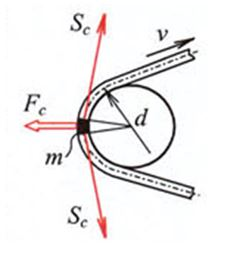
   

In [34]:
F_c=gamma*v**2

Nosakām neizslīdēšanas parametra vērtību:

$$ E_f=e^{\mu \cdot \beta_{drad}}$$

In [35]:
E_f=np.e**(mu*beta_drad)
print(E_f)

4.505086883279303


Nosakām nepieciešamo sākotnējo spriegojumu:

$$ F_i=\frac {F_u}{2} \cdot \frac {E_f+1} {E_f-1}$$

In [36]:
F_i=(F_u/2)*((E_f+1)/(E_f-1))

Nosakām slogotā zara spriegojuma spēku:

$$ F_1=F_i+F_c+\frac {F_u} {2} $$

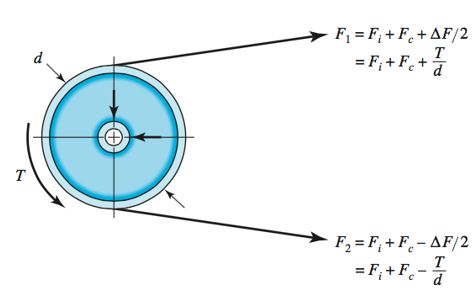


Nosakām brīvā zara spriegojuma spēku:

$$ F_2=F_1-F_u $$


In [37]:
F_1=F_i+F_c+(F_u/2)
F_2=F_1-F_u
print (F_1)
print (F_2)

295.61315823031674
67.3707935958839


Nosakām slodzi uz vārpstu: 
    
$$ F_{w}=F_1+F_2 \cdot sin {\frac{\beta_{drad}}{2}}+2 \cdot F_c$$

In [38]:
F_w=F_1+F_2*np.sin(beta_drad/2)+2*F_c

print(F_w) # [N]

367.4051160651098


Nosakām nepieciešamo efektīvo siksnas garumu:

$$ L_{eff}=2 \cdot C \cdot sin {\frac{\beta_d}{2}} +\frac {\pi}{2} \cdot \left(  d+D+4 \cdot \frac {t}{2} + \frac {(D-d) \cdot (180-\beta_d)}{180} \right)$$

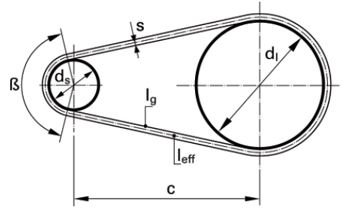


    

In [39]:
L_eff=2 * C * np.sin (beta_drad/2) +np.pi/2 *(  d+D+4 *t/2 + ((D-d) * (180-beta_d))/180 )
print (L_eff) # [m]

4.922232788352297


Nosakām nepieciešamo relatīvo sākotnējo pagarinājumu:

$$ \epsilon_0=\frac {F_i+F_c} {b \cdot K_1} $$

Nosakām nepieciešamo sākotnējo pagarinājumu:

$$ X_\epsilon=\frac {L_{eff} \cdot \epsilon_0} {2 \cdot 100} $$

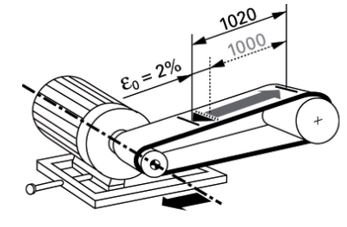

In [40]:
epsilon_0=(F_i+F_c)/(b*K_1)

x_epsilon=(L_eff*epsilon_0)/(2*100)

print (epsilon_0) # [%]
print (x_epsilon) # [m]

2.3855165039644035
0.05871033776484565
